# Bibliotecas

In [1]:
from power import *
from power.systems import *
from optimal_power_flow.linear_opf.opf_loss import LinearDispatch
from metaheuristic.aoa_metaheuristic.optimizer import AOA

from trabalhos_transmissao.utils.load_scen import apply_load_scen
from trabalhos_transmissao.utils.wnd_scen import apply_wnd_scen

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

# 2 Barras

## Bateria e Carga (atuando como gerador)

In [2]:
# Sistema Bateria e Carga
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
l1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
Battery(id=1, bus=bus1, p_max_mw=90, p_min_mw=-80, capacity_mwh=100, soc_mwh=100, cost_charge_mw=0, cost_discharge_mw=399)
Load(id=1, bus=bus2, p_mw=80, cost_shed_mw=400)

solver = LinearDispatch(net=net)
results = solver.solve_loss()
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net.lines))]}")

Função Objetivo: 31920.0
Energia Armazenada: [0.0]
Energia Fornecida: [80.0]
Corte de Carga: [0.0]
Fluxo nas Linhas: [80.0]


C:\Users\gabri\AppData\Local\Temp\ipykernel_49888\2136802245.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabri\AppData\Local\Temp\ipykernel_49888\2136802245.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabri\AppData\Local\Temp\ipykernel_49888\2136802245.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys 

## Bateria e Eólico (atuando como carga)

In [3]:
# Sistema Bateria e Eolico
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
line = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
wnd = WindGenerator(id=1, bus=bus2, p_max_mw=80)
bat = Battery(id=1, bus=bus1, p_max_mw=100, p_min_mw=-100, capacity_mwh=100, soc_mwh=20, cost_charge_mw=-0.1, cost_discharge_mw=399)

solver = LinearDispatch(net=net)
results = solver.solve_loss()
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net.lines))]}")

Função Objetivo: -8.0
Energia Armazenada: [80.0]
Energia Fornecida: [0.0]
Corte de Carga: []
Fluxo nas Linhas: [-80.0]


C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\506009822.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\506009822.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\506009822.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

## Modelo desacoplado com restrição de SOC 

In [4]:
# Sistema Bateria e Carga
net_1h = Network(sb_mva=100)
bus1 = Bus(net_1h, id=1, name="Bus 1")
bus2 = Bus(net_1h, id=2, name="Bus 2")
l1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
Battery(id=1, bus=bus1, p_max_mw=40, p_min_mw=-10, capacity_mwh=100, soc_mwh=100, cost_charge_mw=0, cost_discharge_mw=399)
Load(id=1, bus=bus2, p_mw=80, cost_shed_mw=400)

solver = LinearDispatch(net=net_1h)
results = solver.solve_loss()

print(f"Resultados 1 Hora:")
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net_1h.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net_1h.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net_1h.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net_1h.lines))]}")

# Getting dispatch or discharge from 1 hour earlier to modify soc for the next simulation
prev_battery_dispatch = float(results['Battery']['P_Out_MW'][0]) - float(results['Battery']['P_In_MW'][0])
print(f"Despacho/Carregamento Anterior: {prev_battery_dispatch} MW")

soc_mwh = net_1h.batteries[0].soc_mwh - prev_battery_dispatch
print(f"Estado de Carga Atualizado: {soc_mwh} MWh")

net_2h = Network(sb_mva=100)
bus1 = Bus(net_2h, id=1, name="Bus 1")
bus2 = Bus(net_2h, id=2, name="Bus 2")
l1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
wnd = WindGenerator(id=1, bus=bus2, p_max_mw=80)
bat = Battery(id=1, bus=bus1, p_max_mw=10, p_min_mw=-40, capacity_mwh=100, soc_mwh=soc_mwh, cost_charge_mw=-0.1, cost_discharge_mw=399)

solver = LinearDispatch(net=net_2h)
results = solver.solve_loss()

print(f"Resultados 2 Hora:")
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net_2h.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net_2h.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net_2h.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net_2h.lines))]}")

Resultados 1 Hora:
Função Objetivo: 31960.0
Energia Armazenada: [0.0]
Energia Fornecida: [40.0]
Corte de Carga: [40.0]
Fluxo nas Linhas: [40.0]
Despacho/Carregamento Anterior: 40.0 MW
Estado de Carga Atualizado: 60.0 MWh
Resultados 2 Hora:
Função Objetivo: -4.0
Energia Armazenada: [40.0]
Energia Fornecida: [0.0]
Corte de Carga: []
Fluxo nas Linhas: [-40.0]


C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\892497278.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net_1h.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\892497278.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net_1h.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\892497278.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. I

# 3 Barras:

In [5]:
# Sistema Bateria Carga e Eolico com sobra de geração
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
bus3 = Bus(net, id=3, name="Bus 3")

line1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=10)
line2 = Line(id=2, from_bus=bus2, to_bus=bus3, x_pu=0.1, flow_max_pu=10)
line3 = Line(id=3, from_bus=bus1, to_bus=bus3, x_pu=0.1, flow_max_pu=10)

wnd = WindGenerator(id=1, bus=bus1, p_max_mw=150)
bat = Battery(id=1, bus=bus2, p_max_mw=50, p_min_mw=-50, capacity_mwh=100, soc_mwh=50, cost_charge_mw=-1, cost_discharge_mw=350)
load = Load(id=1, bus=bus2, p_mw=100, cost_shed_mw=400)

solver = LinearDispatch(net=net)
results = solver.solve_loss(verbose=False)
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net.lines))]}")
print(f"Curtailment Eolico: {[float(results['Wind_Generation']['Curtailment_MW'][i]) for i in range(len(net.wind_generators))]}")


Função Objetivo: -50.0
Energia Armazenada: [50.0]
Energia Fornecida: [0.0]
Corte de Carga: [0.0]
Fluxo nas Linhas: [100.0, -50.0, 50.0]
Curtailment Eolico: [0.0]


C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\858819549.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\858819549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\858819549.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

In [6]:
# Sistema Bateria Carga e Eolico com falta de geração
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
bus3 = Bus(net, id=3, name="Bus 3")

line1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=10)
line2 = Line(id=2, from_bus=bus2, to_bus=bus3, x_pu=0.1, flow_max_pu=10)
line3 = Line(id=3, from_bus=bus1, to_bus=bus3, x_pu=0.1, flow_max_pu=10)

wnd = WindGenerator(id=1, bus=bus1, p_max_mw=50)
bat = Battery(id=1, bus=bus2, p_max_mw=50, p_min_mw=-50, capacity_mwh=100, soc_mwh=50, cost_charge_mw=-1, cost_discharge_mw=350)
load = Load(id=1, bus=bus2, p_mw=100, cost_shed_mw=400)

solver = LinearDispatch(net=net)
results = solver.solve_loss(verbose=False)
print(f"Função Objetivo: {results['FOB_Value']}")
print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
print(f"Corte de Carga: {[float(results['Load_Shed']['P_Shed_MW'][i]) for i in range(len(net.loads))]}")
print(f"Fluxo nas Linhas: {[float(results['Line']['Flow_MW'][i]) for i in range(len(net.lines))]}")
print(f"Curtailment Eolico: {[float(results['Wind_Generation']['Curtailment_MW'][i]) for i in range(len(net.wind_generators))]}")

Função Objetivo: 17500.0
Energia Armazenada: [0.0]
Energia Fornecida: [50.0]
Corte de Carga: [0.0]
Fluxo nas Linhas: [33.333332999999996, -16.666667, 16.666667]
Curtailment Eolico: [0.0]


C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\106266565.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Armazenada: {[float(results['Battery']['P_In_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\106266565.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energia Fornecida: {[float(results['Battery']['P_Out_MW'][i]) for i in range(len(net.batteries))]}")
C:\Users\gabriel.halfeld\AppData\Local\Temp\ipykernel_32832\106266565.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

# B6L8 com Horizonte 24h

In [7]:
NET = B6L8Charged()
H = 24
RNG1 = np.random.default_rng(seed=42)
RNG2 = np.random.default_rng(seed=41)

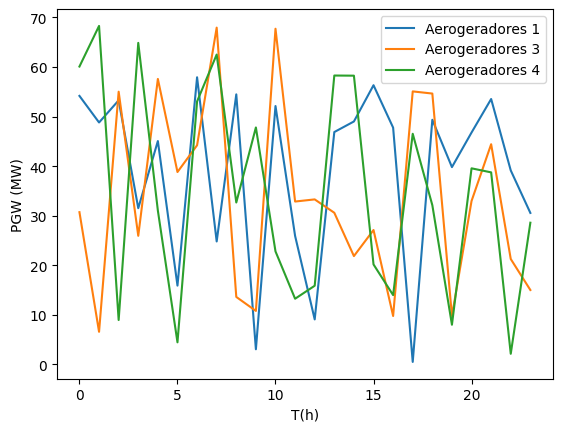

In [8]:
wind_profiles = []
load_profiles = []
for i in range(H):
    net_h = deepcopy(NET) 
    apply_wnd_scen(net_h, rng=RNG1)
    apply_load_scen(net_h, rng=RNG2)
    #storing profiles of each wind generator and load at this hour I dont like profile name because it seems like its hourly profile but its just at this hour
    wind_profiles.append([wnd.p_max_mw for wnd in net_h.wind_generators])
    load_profiles.append([load.p_mw for load in net_h.loads])

# Now printing the profiles of each wind generator 
for i, wnd in enumerate(NET.wind_generators):
    plt.plot([wind_profiles[h][i] for h in range(H)], label=f'Aerogeradores {wnd.bus.id}')
plt.xlabel('T(h)')
plt.ylabel('PGW (MW)')
plt.legend()
plt.show()


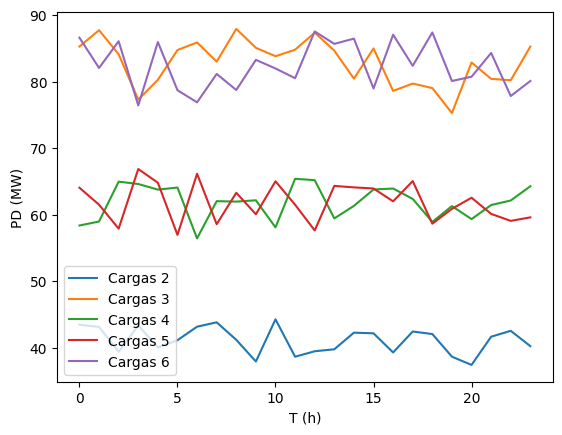

In [9]:
# Now printing the profiles of each load
for i, load in enumerate(NET.loads):
    plt.plot([load_profiles[h][i] for h in range(H)], label=f'Cargas {load.bus.id}')
plt.xlabel('T (h)')
plt.ylabel('PD (MW)')
plt.legend()
plt.show()

In [10]:
NET = B6L8Charged()
H = 24
hour_costs = []
RNG1 = np.random.default_rng(seed=42)
RNG2 = np.random.default_rng(seed=41)
for h in range(H):
    net_h = deepcopy(NET) 
    apply_wnd_scen(net_h, rng=RNG1)
    apply_load_scen(net_h, rng=RNG2)
    
    solver = LinearDispatch(net=net_h)
    results = solver.solve_loss(verbose=False)
    
    hour_costs.append(results['FOB_Value'])
    print(f"Hour {h+1}: Cost = {results['FOB_Value']}")
print(f"Total Cost over {H} hours: {sum(hour_costs)}")

Hour 1: Cost = 38477.813786
Hour 2: Cost = 45910.543130000005
Hour 3: Cost = 40721.102
Hour 4: Cost = 34289.939224999995
Hour 5: Cost = 31938.530679999996
Hour 6: Cost = 46593.65604
Hour 7: Cost = 30315.882222400003
Hour 8: Cost = 26154.36924
Hour 9: Cost = 48087.0588
Hour 10: Cost = 42364.74377
Hour 11: Cost = 31153.9031
Hour 12: Cost = 47448.379069999995
Hour 13: Cost = 48934.97365
Hour 14: Cost = 36675.84976
Hour 15: Cost = 39733.82911
Hour 16: Cost = 47981.6594304
Hour 17: Cost = 56201.1584
Hour 18: Cost = 30613.860800000002
Hour 19: Cost = 30324.27248
Hour 20: Cost = 52784.174264999994
Hour 21: Cost = 33518.062
Hour 22: Cost = 31757.73812
Hour 23: Cost = 52778.119969
Hour 24: Cost = 47859.936530000006
Total Cost over 24 hours: 972619.5555778


In [11]:
NET = B6L8Charged()
H = 24
RNG1 = np.random.default_rng(seed=42)
RNG2 = np.random.default_rng(seed=41)
bat = Battery(id=99, bus=NET.buses[1], p_max_mw=50, p_min_mw=-50, capacity_mwh=200, soc_mwh=100, cost_charge_mw=-1, cost_discharge_mw=350)
hour_costs = []
for h in range(H):
    net_h = deepcopy(NET) 
    apply_wnd_scen(net_h, rng=RNG1)
    apply_load_scen(net_h, rng=RNG2)
    
    solver = LinearDispatch(net=net_h)
    results = solver.solve_loss(verbose=False)
    # Getting dispatch or discharge from 1 hour earlier to modify soc for the next simulation
    prev_battery_dispatch = float(results['Battery']['P_Out_MW'].iloc[0]) - float(results['Battery']['P_In_MW'].iloc[0])
    bat.soc_mwh -= prev_battery_dispatch
    hour_costs.append(results['FOB_Value'])
    # print(f"Hour {h+1}: Cost = {results['FOB_Value']}")
    print(f"H{h+1}: B_OUT={float(results['Battery']['P_Out_MW'].iloc[0])} B_IN={float(results['Battery']['P_In_MW'].iloc[0])} SOC={bat.soc_mwh}")
print(f"Total Cost over {H} hours: {sum(hour_costs)}")


H1: B_OUT=19.459038 B_IN=0.0 SOC=80.54096200000001
H2: B_OUT=19.130472 B_IN=0.0 SOC=61.41049000000001
H3: B_OUT=25.086931 B_IN=0.0 SOC=36.32355900000001
H4: B_OUT=18.161779 B_IN=0.0 SOC=18.16178000000001
H5: B_OUT=5.669751199999999 B_IN=0.0 SOC=12.49202880000001
H6: B_OUT=6.2460144 B_IN=0.0 SOC=6.246014400000011
H7: B_OUT=0.10164342 B_IN=0.0 SOC=6.14437098000001
H8: B_OUT=0.8089499099999999 B_IN=0.0 SOC=5.33542107000001
H9: B_OUT=2.6677105 B_IN=0.0 SOC=2.6677105700000103
H10: B_OUT=1.3338553 B_IN=0.0 SOC=1.3338552700000104
H11: B_OUT=0.66692763 B_IN=0.0 SOC=0.6669276400000104
H12: B_OUT=0.33346382 B_IN=0.0 SOC=0.33346382000001035
H13: B_OUT=0.16673191 B_IN=0.0 SOC=0.16673191000001034
H14: B_OUT=0.083365955 B_IN=0.0 SOC=0.08336595500001033
H15: B_OUT=0.041682977999999996 B_IN=0.0 SOC=0.041682977000010335
H16: B_OUT=0.020841488999999998 B_IN=0.0 SOC=0.020841488000010337
H17: B_OUT=0.010420744000000001 B_IN=0.0 SOC=0.010420744000010336
H18: B_OUT=0.0 B_IN=0.0 SOC=0.010420744000010336
H19:

# Dimensionamento de Bateria

--- Iniciando Loop de Escalas ---

--- Simulando Escala 0.10 ---
>> Scale 0.10: Ops = 970,666.68 | Inv = 2,000.00 | TOTAL = 972,666.68

--- Simulando Escala 0.14 ---
>> Scale 0.14: Ops = 969,818.06 | Inv = 2,750.00 | TOTAL = 972,568.06

--- Simulando Escala 0.17 ---
>> Scale 0.17: Ops = 969,081.21 | Inv = 3,500.00 | TOTAL = 972,581.21

--- Simulando Escala 0.21 ---
>> Scale 0.21: Ops = 968,267.67 | Inv = 4,250.00 | TOTAL = 972,517.67

--- Simulando Escala 0.25 ---
>> Scale 0.25: Ops = 967,326.78 | Inv = 5,000.00 | TOTAL = 972,326.78

--- Simulando Escala 0.29 ---
>> Scale 0.29: Ops = 966,404.95 | Inv = 5,750.00 | TOTAL = 972,154.95

--- Simulando Escala 0.32 ---
>> Scale 0.32: Ops = 965,498.77 | Inv = 6,500.00 | TOTAL = 971,998.77

--- Simulando Escala 0.36 ---
>> Scale 0.36: Ops = 964,674.12 | Inv = 7,250.00 | TOTAL = 971,924.12

--- Simulando Escala 0.40 ---
>> Scale 0.40: Ops = 963,842.57 | Inv = 8,000.00 | TOTAL = 971,842.57

--- Simulando Escala 0.44 ---
>> Scale 0.44: Ops = 963,0

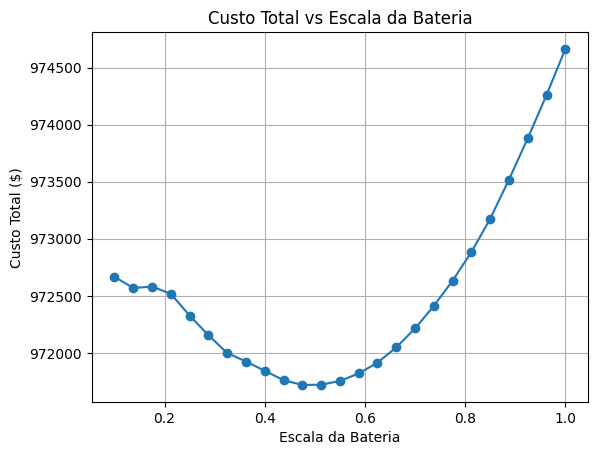

In [26]:
import numpy as np
from copy import deepcopy

# --- 1. SETUP INICIAL DA REDE ---
NET = B6L8Charged()
H = 24

# --- 2. CRIAÇÃO DA BATERIA (TEMPLATE BASE) ---
# Definimos a bateria padrão (Equivalente a Scale = 1.0)
BASE_CAPACITY = 1000.0
BASE_SOC = BASE_CAPACITY / 2  # Começa com 50% de SoC
BASE_P_MAX = BASE_SOC / 2
BASE_P_MIN = -BASE_P_MAX

# Cria a bateria na rede original
Battery(id=99, bus=NET.buses[1], 
        p_max_mw=BASE_P_MAX, p_min_mw=BASE_P_MIN, 
        capacity_mwh=BASE_CAPACITY, soc_mwh=BASE_SOC, 
        cost_charge_mw=-1, cost_discharge_mw=350)

# Salva os valores PU originais para referência na função de escala
baseline_capacity_pu = NET.batteries[0].capacity_pu
baseline_p_max_pu = NET.batteries[0].p_max_pu
baseline_p_min_pu = NET.batteries[0].p_min_pu

# --- 3. FUNÇÕES AUXILIARES ---
def scale_bat(scale, net):
    """Ajusta o tamanho físico e o conteúdo (SoC) da bateria."""
    for bat in net.batteries:
        # A. Escala PUs (para o solver matemático)
        bat.capacity_pu = baseline_capacity_pu * scale
        bat.p_max_pu = baseline_p_max_pu * scale
        bat.p_min_pu = baseline_p_min_pu * scale
        
        # B. Escala Valores Absolutos (para garantir consistência física)
        if hasattr(bat, 'capacity_mwh'):
            bat.capacity_mwh = BASE_CAPACITY * scale
            bat.p_max_mw = BASE_P_MAX * scale
            bat.p_min_mw = BASE_P_MIN * scale
            
            # C. Escala o SoC Inicial! (Se a bateria diminui, a carga inicial também deve diminuir)
            bat.soc_mwh = BASE_SOC * scale 

def investiment_cost(scale, net):
    inv = 0
    for bat in net.batteries:
        inv += bat.capacity_mwh * 20
    return inv

# --- 4. LOOP DE SIMULAÇÃO ---
scales = np.linspace(0.1, 1.0, 25) 
scale_costs = []

print(f"--- Iniciando Loop de Escalas ---")

for scale in scales:
    # A. Prepara a rede clonada
    net_scale = deepcopy(NET)
    scale_bat(scale, net_scale)
    
    # B. Calcula investimento
    inv = investiment_cost(scale, net_scale)
    
    # C. Reseta RNGs e variáveis de estado
    RNG1 = np.random.default_rng(seed=42)
    RNG2 = np.random.default_rng(seed=41)
    
    current_soc = net_scale.batteries[0].soc_mwh 
    
    hour_costs = []
    
    print(f"\n--- Simulando Escala {scale:.2f} ---")

    for h in range(H):
        # Cria clone horário
        net_h = deepcopy(net_scale) 
        
        # Injeta SoC atual
        net_h.batteries[0].soc_mwh = current_soc
        
        # Cenários e Solver
        apply_wnd_scen(net_h, rng=RNG1)
        apply_load_scen(net_h, rng=RNG2)
        
        solver = LinearDispatch(net=net_h)
        results = solver.solve_loss(verbose=False)
        
        # Atualiza SoC
        p_out = float(results['Battery']['P_Out_MW'].iloc[0])
        p_in = float(results['Battery']['P_In_MW'].iloc[0])
        current_soc -= (p_out - p_in)
        
        # Trava visual para escala 0 não mostrar -0.00000001
        if scale == 0: current_soc = 0.0
            
        hour_costs.append(results['FOB_Value'])
        
    # Resultados finais da escala
    total_operational_cost = sum(hour_costs)
    total_final = total_operational_cost + inv
    
    scale_costs.append((scale, total_final))
    
    # Print formatado com separador de milhar
    print(f">> Scale {scale:.2f}: Ops = {total_operational_cost:,.2f} | Inv = {inv:,.2f} | TOTAL = {total_final:,.2f}")

# --- 5. RESUMO FINAL (Fora do Loop) ---
print("\n" + "="*30)
print("       RESUMO FINAL")
print("="*30)
for s, c in scale_costs:
    print(f"Scale {s:.2f} -> $ {c:,.2f}")


# Gráfico de Escalas vs Custo Total
scales_plot = [sc[0] for sc in scale_costs]
costs_plot = [sc[1] for sc in scale_costs]
plt.plot(scales_plot, costs_plot, marker='o')
plt.xlabel('Escala da Bateria')
plt.ylabel('Custo Total ($)')
plt.title('Custo Total vs Escala da Bateria')
plt.grid(True)
plt.show()

In [ ]:
# Preciso calcular o curtailment medio das 24h e corte de carga medio das 24h

NET = B6L8Charged()
H = 24
RNG1 = np.random.default_rng(seed=42)
RNG2 = np.random.default_rng(seed=41)
bat = Battery(id=99, bus=NET.buses[0], p_max_mw=117.5, p_min_mw=-117.5, capacity_mwh=470, soc_mwh=235, cost_charge_mw=-1, cost_discharge_mw=350)
hour_costs = []
curtailments = []
load_sheds = []
for h in range(H):
    net_h = deepcopy(NET) 
    apply_wnd_scen(net_h, rng=RNG1)
    apply_load_scen(net_h, rng=RNG2)
    
    solver = LinearDispatch(net=net_h)
    results = solver.solve_loss(verbose=False)
    # Getting dispatch or discharge from 1 hour earlier to modify soc for the next simulation
    prev_battery_dispatch = float(results['Battery']['P_Out_MW'].iloc[0]) - float(results['Battery']['P_In_MW'].iloc[0])
    bat.soc_mwh -= prev_battery_dispatch
    hour_costs.append(results['FOB_Value'])
    print(f"Hour {h+1}: Cost = {results['FOB_Value']}")
    curtailments.append(float(results['Wind_Generation']['Curtailment_MW'].iloc[0]))
    load_sheds.append(float(results['Load_Shed']['P_Shed_MW'].iloc[0]))


print(f"Total Cost over {H} hours: {sum(hour_costs)}")
print(f"Average Curtailment over {H} hours: {np.mean(curtailments)} MW")
print(f"Average Load Shed over {H} hours: {np.mean(load_sheds)} MW")

Total Cost over 24 hours: 972619.5555778
Average Curtailment over 24 hours: 5.682696467123049 MW
Average Load Shed over 24 hours: 11.896607277083334 MW


Iniciando Otimização para 8 linhas candidatas...
Rodando iteração:1
At iteration 1 the best solution fitness is 638187.0017875
Rodando iteração:2
At iteration 2 the best solution fitness is 638187.0017875
Rodando iteração:3
At iteration 3 the best solution fitness is 638187.0017875
Rodando iteração:4
At iteration 4 the best solution fitness is 638187.0017875
Rodando iteração:5
At iteration 5 the best solution fitness is 638187.0017875
Rodando iteração:6
At iteration 6 the best solution fitness is 638187.0017875
Rodando iteração:7
At iteration 7 the best solution fitness is 638187.0017875
Rodando iteração:8
At iteration 8 the best solution fitness is 638187.0017875
Rodando iteração:9
At iteration 9 the best solution fitness is 634249.592300955
Rodando iteração:10
At iteration 10 the best solution fitness is 634249.592300955
Rodando iteração:11
At iteration 11 the best solution fitness is 634249.592300955
Rodando iteração:12
At iteration 12 the best solution fitness is 634249.592300955
R

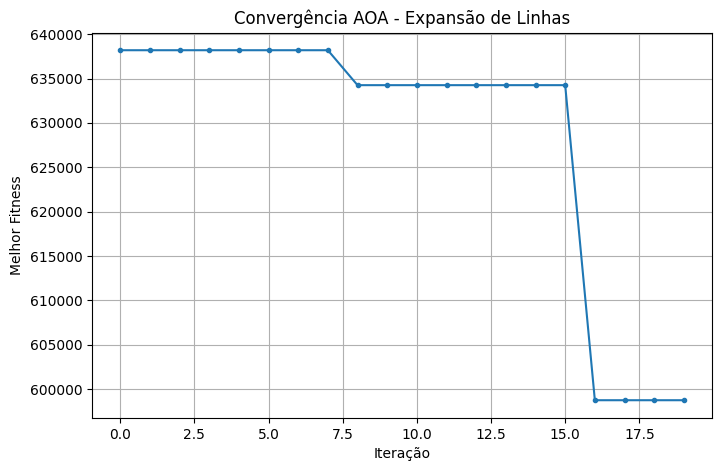

In [34]:
# --- 1. FITNESS FUNCTION ---
def fitness_function(continuous_vector):
    # A. Interpretação Binária (0 ou 1) sem alterar o vetor original da AOA
    # O vetor contínuo (0.0 a 1.0) é convertido para decisão de investimento
    binary_decision = [1 if val >= 0.5 else 0 for val in continuous_vector]
    
    # B. Setup da Rede Base
    net = B6L8Charged()
    H = 24
    
    # C. Adiciona Bateria Padrão (Scale = 1.0)
    # Importante: Definir capacidade física fixa para garantir consistência
    BASE_CAPACITY = 200
    BASE_SOC = 100
    Battery(id=99, bus=net.buses[1], 
            p_max_mw=50, p_min_mw=-50, 
            capacity_mwh=BASE_CAPACITY, soc_mwh=BASE_SOC, 
            cost_charge_mw=-1, cost_discharge_mw=350)

    # D. Aplica Investimento (Duplicação de Linhas)
    inv_cost = 0
    original_lines = list(net.lines) # Lista auxiliar para referência
    
    for i, decision in enumerate(binary_decision):
        if decision == 1:
            line_base = original_lines[i]
            # Cria nova linha paralela
            Line(id=len(net.lines)+1, 
                from_bus=line_base.from_bus, 
                to_bus=line_base.to_bus, 
                x_pu=line_base.x_pu, 
                flow_max_pu=line_base.flow_max_pu)
            
            # Custo Estimado: Capacidade * 1000 (Exemplo)
            inv_cost += line_base.flow_max_pu * 2000

    # E. Simulação Operacional (24h com Time-Coupling)
    RNG1 = np.random.default_rng(seed=42)
    RNG2 = np.random.default_rng(seed=41)
    
    # Pega SoC inicial da bateria da rede montada
    current_soc = net.batteries[0].soc_mwh 
    hour_costs = []

    for h in range(H):
        net_h = deepcopy(net) 
        
        # 1. INJEÇÃO DE ESTADO (Fundamental para a bateria funcionar)
        net_h.batteries[0].soc_mwh = current_soc
        
        # 2. Cenários e Solver
        apply_wnd_scen(net_h, rng=RNG1)
        apply_load_scen(net_h, rng=RNG2)
        
        solver = LinearDispatch(net=net_h)
        results = solver.solve_loss(verbose=False)
        
        # 3. Atualiza Memória da Bateria
        p_out = float(results['Battery']['P_Out_MW'].iloc[0])
        p_in = float(results['Battery']['P_In_MW'].iloc[0])
        current_soc -= (p_out - p_in)
        
        # Trava física para não violar limites (opcional, mas recomendada)
        current_soc = max(0, min(current_soc, BASE_CAPACITY))
        
        hour_costs.append(results['FOB_Value'])

    total_ops = sum(hour_costs)
    total_cost = total_ops + inv_cost
    
    return total_cost

# --- 2. CHAMADA PRINCIPAL (EXECUÇÃO) ---

# Descobre a dimensão do problema (número de linhas originais)
temp_net = B6L8Charged()
num_linhas = len(temp_net.lines)

print(f"Iniciando Otimização para {num_linhas} linhas candidatas...")

# Instancia o Otimizador
optimizer = AOA(
    fitness_func=fitness_function,
    dim=num_linhas,
    lb=0.0,
    ub=1.0,
    pop_size=5,     # Aumente se quiser explorar mais
    max_iter=20     # Aumente para convergir melhor
)

# Roda
fitness_best, pop_best, conv_curve = optimizer.solve()

# Processa o resultado para visualização amigável
solucao_binaria = [1 if val >= 0.5 else 0 for val in pop_best]
linhas_duplicadas = [i for i, val in enumerate(solucao_binaria) if val == 1]

print("\n" + "="*40)
print(f"RESULTADO FINAL")
print("="*40)
print(f"Melhor Custo Total: $ {fitness_best:,.2f}")
print(f"Vetor Contínuo:     {np.round(pop_best, 2)}")
print(f"Decisão Binária:    {solucao_binaria}")
print(f"Linhas Duplicadas:  Indices {linhas_duplicadas}")
print("="*40)

# Plota Convergência
optimizer.plot_convergence(title="Convergência AOA - Expansão de Linhas")

In [35]:
# Usando a duplicação proposta, vamos calcular a FOB media, curtailment médio e corte de carga médio das 24h

NET = B6L8Charged()
H = 24
RNG1 = np.random.default_rng(seed=42)
RNG2 = np.random.default_rng(seed=41)
bat = Battery(id=99, bus=NET.buses[1], p_max_mw=50, p_min_mw=-50, capacity_mwh=200, soc_mwh=100, cost_charge_mw=-1, cost_discharge_mw=350)
# Aplicando duplicação das linhas conforme solução ótima
binary_decision = [1, 1, 0, 0, 1, 1, 1, 1]
for i, decision in enumerate(binary_decision):
    if decision == 1:
        line_base = NET.lines[i]
        # Cria nova linha paralela
        Line(id=len(NET.lines)+1, 
            from_bus=line_base.from_bus, 
            to_bus=line_base.to_bus, 
            x_pu=line_base.x_pu, 
            flow_max_pu=line_base.flow_max_pu)
hour_costs = []
curtailments = []
load_sheds = []
for h in range(H):
    net_h = deepcopy(NET) 
    apply_wnd_scen(net_h, rng=RNG1)
    apply_load_scen(net_h, rng=RNG2)
    
    solver = LinearDispatch(net=net_h)
    results = solver.solve_loss(verbose=False)
    # Getting dispatch or discharge from 1 hour earlier to modify soc for the next simulation
    prev_battery_dispatch = float(results['Battery']['P_Out_MW'].iloc[0]) - float(results['Battery']['P_In_MW'].iloc[0])
    bat.soc_mwh -= prev_battery_dispatch
    hour_costs.append(results['FOB_Value'])
    print(f"Hour {h+1}: Cost = {results['FOB_Value']}")
    curtailments.append(float(results['Wind_Generation']['Curtailment_MW'].iloc[0]))
    load_sheds.append(float(results['Load_Shed']['P_Shed_MW'].iloc[0]))

print(f"Total Cost over {H} hours: {sum(hour_costs)}")
print(f"Average Curtailment over {H} hours: {np.mean(curtailments)} MW")
print(f"Average Load Shed over {H} hours: {np.mean(load_sheds)} MW")


Hour 1: Cost = 20595.334170000002
Hour 2: Cost = 28770.422799999997
Hour 3: Cost = 21246.808109999998
Hour 4: Cost = 17435.75906
Hour 5: Cost = 13552.560660000001
Hour 6: Cost = 37204.38655
Hour 7: Cost = 11913.74222
Hour 8: Cost = 5638.90187
Hour 9: Cost = 29825.0663
Hour 10: Cost = 38297.007849999995
Hour 11: Cost = 12625.330355
Hour 12: Cost = 35279.552840000004
Hour 13: Cost = 43370.4774225
Hour 14: Cost = 19290.46233
Hour 15: Cost = 22052.946359999998
Hour 16: Cost = 30276.843963
Hour 17: Cost = 38622.116843
Hour 18: Cost = 23757.970878250002
Hour 19: Cost = 11850.254149299999
Hour 20: Cost = 35304.15225965001
Hour 21: Cost = 15992.190799650001
Hour 22: Cost = 13721.415054825
Hour 23: Cost = 35554.877652395
Hour 24: Cost = 33967.839186215
Total Cost over 24 hours: 596146.4196837851
Average Curtailment over 24 hours: 8.789716130144556e-09 MW
Average Load Shed over 24 hours: 15.649905733333334 MW
